In [1]:
!pip install keras
!pip install tensorflow

In [3]:
!pip3 install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\BUNNY\anaconda3\python.exe -m pip install --upgrade pip


In [4]:
# Importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import ImageFile

In [5]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Ensure the directory paths are correct
training_set = train_datagen.flow_from_directory(r"C:\Users\BUNNY\Documents\Projects\Bone-Classifier\Bone-Classifier\Bone_Dataset\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\train",
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r"C:\Users\BUNNY\Documents\Projects\Bone-Classifier\Bone-Classifier\Bone_Dataset\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\test",
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [9]:
# Function to preprocess the uploaded image and make predictions
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # rescaling
    result = model.predict(img_array)
    return result[0][0]

In [10]:
# Initialising the CNN
classifier = Sequential()

# Adding the Input layer
classifier.add(Input(shape=(64, 64, 3)))

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Training the CNN
history = classifier.fit(training_set,
                         epochs=5,
                         validation_data=test_set)

Epoch 1/5


C:\Users\BUNNY\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 158s 526ms/step - accuracy: 0.6686 - loss: 0.5900 - val_accuracy: 0.7569 - val_loss: 0.5470
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 63s 215ms/step - accuracy: 0.8457 - loss: 0.3672 - val_accuracy: 0.8735 - val_loss: 0.4282
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 62s 210ms/step - accuracy: 0.9098 - loss: 0.2537 - val_accuracy: 0.8419 - val_loss: 0.4519
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 60s 205ms/step - accuracy: 0.9340 - loss: 0.1804 - val_accuracy: 0.9012 - val_loss: 0.2991
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 61s 206ms/step - accuracy: 0.9395 - loss: 0.1599 - val_accuracy: 0.8992 - val_loss: 0.3186


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
# Create a Sequential model
model = Sequential()


In [14]:
# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

C:\Users\BUNNY\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [16]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# Save the model
model.save('model.h5')

print("Model saved successfully!")

Model saved successfully!


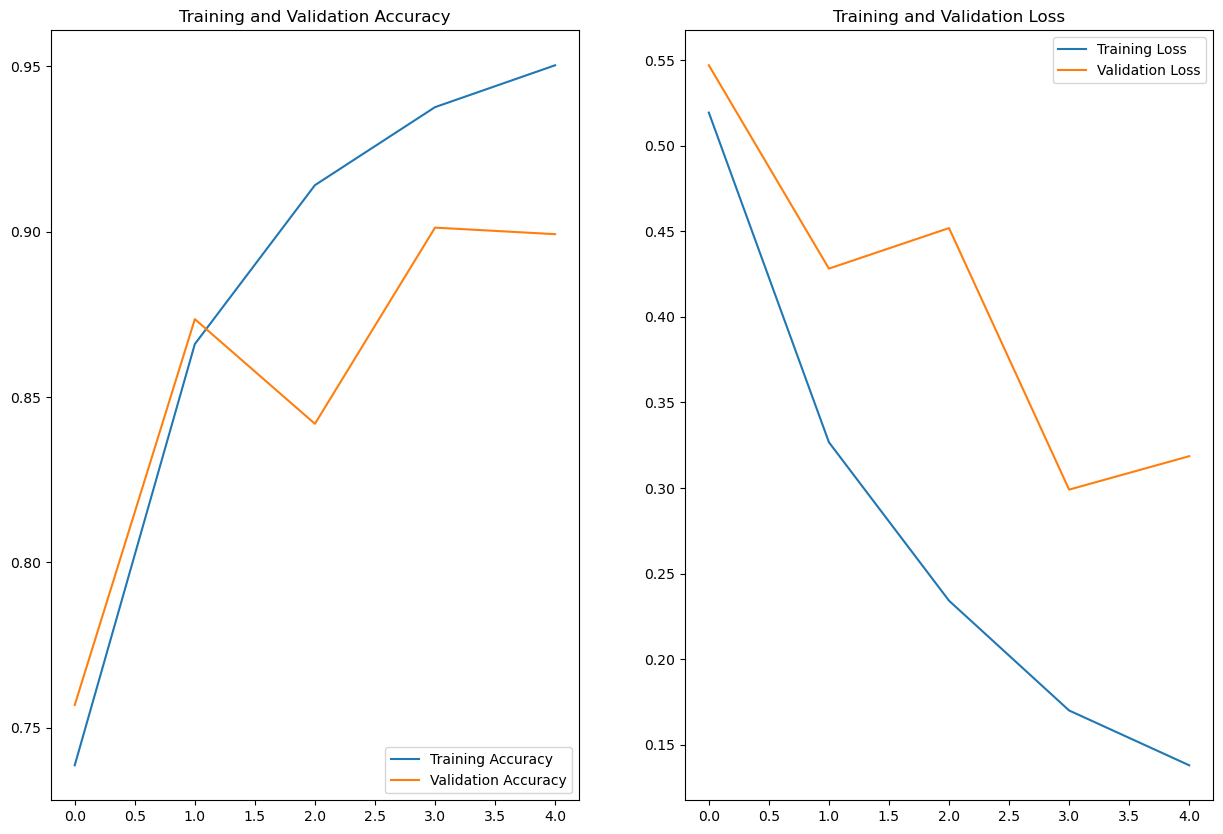

In [18]:
# Extracting values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['loss']))

# Plotting training and validation accuracy
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


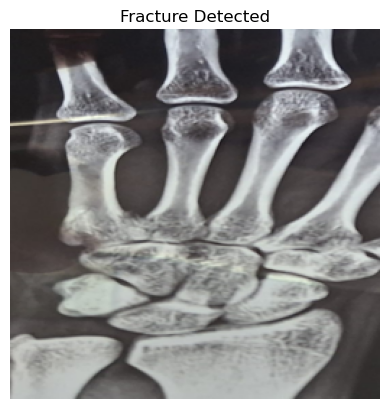

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the uploaded image
uploaded_image_path = "C:\\Users\\BUNNY\\Pictures\\New folder\\fractured.jpg"
# Above uploaded image is an actual X-ray of my recently fractured hand

# Predicting the class of the uploaded image
prediction = predict_image(uploaded_image_path, classifier)

# Open and resize the image
with Image.open(uploaded_image_path) as img:
    img_resized = img.resize((256, 256))

# Display the resized image and the prediction result
plt.imshow(img_resized)
plt.axis('off')
if prediction > 0.5:
    plt.title('No Fractures Here.')
else:
    plt.title('Fracture Detected')
plt.show()
